## Progeria PB000188 LoBa 72h plate AreaShape features filtered analysis
### Eccentricity and other features visualized
### PCA TSNE and UMAP with labels

In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler

In [42]:
data = pd.read_csv('/share/data/analyses/martin/036_Progeria_LoBa_48h_72h/004_analysis/PB000188_LoBa_72h_family4_PCA_tSNE_median_M388_norm_AreaShape/data_for_ml/dfZscores Progeria PB000188 LoBa 72h family 4 Zscores normalized on PHB000001_M388 All Features.csv')
data = data.drop(columns=['Count_nuclei'], errors='ignore')
data.head(2)

,WellID,plate,batch_id,person_plate,comp_conc,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,...,AreaShape_MajorAxisLength_nuclei,AreaShape_MaxFeretDiameter_nuclei,AreaShape_MaximumRadius_nuclei,AreaShape_MeanRadius_nuclei,AreaShape_MedianRadius_nuclei,AreaShape_MinFeretDiameter_nuclei,AreaShape_MinorAxisLength_nuclei,AreaShape_Orientation_nuclei,AreaShape_Perimeter_nuclei,AreaShape_Solidity_nuclei
0,PB000188_A02,PB000188,HY-15315,M388_PB000188,HY-15315_0.1,-1.013594,-0.522126,-0.040219,-0.410872,-0.075324,...,-0.115800,-0.106104,-1.304094,-1.661177,-1.966036,-1.004302,-1.207693,1.994335,-0.404440,-0.929323
1,PB000188_A03,PB000188,HY-15136,P387_PB000188,HY-15136_4.0,7.626088,7.455057,1.809851,-0.861000,1.822845,...,5.271371,5.858948,5.288124,5.610282,6.737703,6.232857,6.359878,1.560321,7.917396,-2.148127


In [62]:
df = data

### GTP round 1

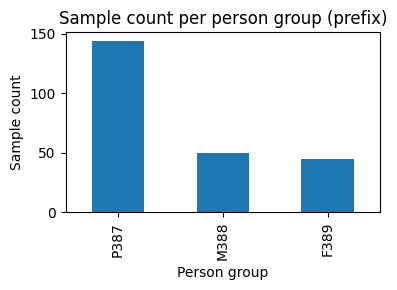

({'shape': (239, 29),
  'unique_plates': 1,
  'unique_persons': ['M388', 'P387', 'F389']},
 person_plate
 P387    144
 M388     50
 F389     45
 Name: count, dtype: int64,
                                            mean       std        min  \
 AreaShape_Area_nuclei                  1.268372  3.750989 -20.000000   
 AreaShape_BoundingBoxArea_nuclei       1.611144  3.630581 -20.000000   
 AreaShape_BoundingBoxMaximum_X_nuclei  0.130491  1.124379  -4.361238   
 AreaShape_BoundingBoxMaximum_Y_nuclei  0.053687  1.261930  -4.914765   
 AreaShape_BoundingBoxMinimum_X_nuclei  0.094875  1.117451  -4.293478   
 
                                              max  
 AreaShape_Area_nuclei                  13.683519  
 AreaShape_BoundingBoxArea_nuclei       13.498103  
 AreaShape_BoundingBoxMaximum_X_nuclei   3.343197  
 AreaShape_BoundingBoxMaximum_Y_nuclei   4.053765  
 AreaShape_BoundingBoxMinimum_X_nuclei   3.339372  ,
 AreaShape_BoundingBoxMinimum_Y_nuclei  AreaShape_Center_Y_nuclei      0.99

In [4]:
# Basic exploration and summary of the dataset
summary = {}

# 1. Basic info
summary['shape'] = df.shape

# 2. Count unique entries for identifiers
summary['unique_plates'] = df['plate'].nunique()
summary['unique_persons'] = df['person_plate'].str[:4].unique().tolist()

# 3. Count of samples per person_plate group
samples_per_group = df['person_plate'].str[:4].value_counts()

# 4. Summary statistics for numeric columns
numeric_summary = df.describe().T[['mean', 'std', 'min', 'max']]

# 5. Correlation matrix (top 5 correlated pairs)
corr_matrix = df.select_dtypes(float).corr().abs()
top_corr = (
    corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))
    .stack()
    .sort_values(ascending=False)
    .head(5)
)

# 6. Bar plot of sample counts per group
plt.figure(figsize=(4, 3))
samples_per_group.plot(kind='bar')
plt.title("Sample count per person group (prefix)")
plt.xlabel("Person group")
plt.ylabel("Sample count")
plt.tight_layout()
plt.show()

summary, samples_per_group, numeric_summary.head(5), top_corr


### Regarding Eccentricity

#### Eccentricity is inversely related to nucleus size and radius measures—more elongated nuclei show smaller axis and diameter metrics.

AreaShape_MinorAxisLength_nuclei      -0.707618
AreaShape_MinFeretDiameter_nuclei     -0.706346
AreaShape_MaximumRadius_nuclei        -0.681216
AreaShape_MeanRadius_nuclei           -0.582643
AreaShape_MedianRadius_nuclei         -0.531345
AreaShape_ConvexArea_nuclei           -0.519766
AreaShape_Area_nuclei                 -0.512370
AreaShape_EquivalentDiameter_nuclei   -0.500222
AreaShape_Extent_nuclei               -0.487257
AreaShape_BoundingBoxArea_nuclei      -0.480552
Name: AreaShape_Eccentricity_nuclei, dtype: float64


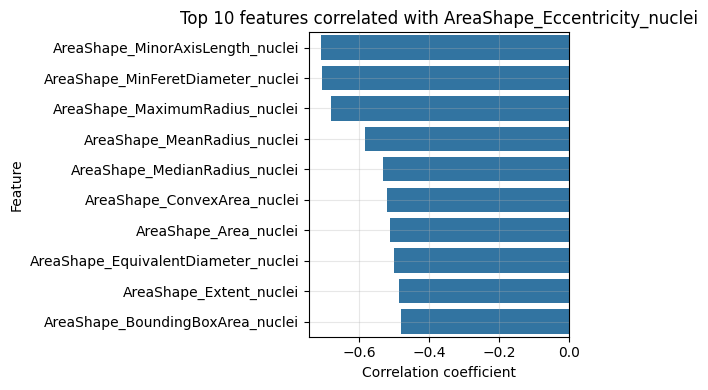

In [5]:
# Calculate correlations with AreaShape_Eccentricity_nuclei
corr_with_ecc = (
    df.corr(numeric_only=True)['AreaShape_Eccentricity_nuclei']
    .drop('AreaShape_Eccentricity_nuclei')
    .sort_values(key=abs, ascending=False)
)

# Display top 10 correlations
print(corr_with_ecc.head(10))

# Plot top 10 correlations
plt.figure(figsize=(6, 4))
sns.barplot(
    x=corr_with_ecc.head(10).values,
    y=corr_with_ecc.head(10).index,
    orient='h'
)
plt.title("Top 10 features correlated with AreaShape_Eccentricity_nuclei")
plt.xlabel("Correlation coefficient")
plt.ylabel("Feature")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualization of Eccentricity and all remaining features

In [65]:
df = data
df.batch_id.unique()

array(['HY-15315', 'HY-15136', 'PHB000001', 'PHB000016', 'HY-Y0272',
       'PHB000008', 'PHB000018', 'HY-15136_HY-15315', 'PHB000006',
       'PHB000004', 'HY-101012', 'PHB000015', 'PHB000010', 'SIGMA-428020',
       'HY-15315_HY-15136', 'SIGMA-TA9H98772C6C', 'PHB000012',
       'PHB000019', 'HY-18258', 'HY-10219', 'HY-100350', 'PHB000002'],
      dtype=object)

### new column person

In [8]:
df['person'] = df['person_plate'].str[:4]

### Retaining only DMSO

In [66]:
#df = df[df['batch_id'].str.startswith('PHB000001')]
df = df[df['batch_id'].str.startswith(('PHB000001', 'HY-15136', 'HY-15315'))] # Retains combinations treatments as well
#df = df[df['batch_id'].isin(['PHB000001', 'HY-15136', 'HY-15315'])] # Retains single compound treatments
df

,WellID,plate,batch_id,person_plate,comp_conc,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,...,AreaShape_MajorAxisLength_nuclei,AreaShape_MaxFeretDiameter_nuclei,AreaShape_MaximumRadius_nuclei,AreaShape_MeanRadius_nuclei,AreaShape_MedianRadius_nuclei,AreaShape_MinFeretDiameter_nuclei,AreaShape_MinorAxisLength_nuclei,AreaShape_Orientation_nuclei,AreaShape_Perimeter_nuclei,AreaShape_Solidity_nuclei
0,PB000188_A02,PB000188,HY-15315,M388_PB000188,HY-15315_0.1,-1.013594,-0.522126,-0.040219,-0.410872,-0.075324,...,-0.115800,-0.106104,-1.304094,-1.661177,-1.966036,-1.004302,-1.207693,1.994335,-0.404440,-0.929323
1,PB000188_A03,PB000188,HY-15136,P387_PB000188,HY-15136_4.0,7.626088,7.455057,1.809851,-0.861000,1.822845,...,5.271371,5.858948,5.288124,5.610282,6.737703,6.232857,6.359878,1.560321,7.917396,-2.148127
2,PB000188_A04,PB000188,PHB000001,P387_PB000188,PHB000001_0.1,1.393692,1.950029,0.344374,-0.724915,0.288743,...,-0.178672,1.190580,2.709993,0.843610,0.239417,4.554181,3.804085,-1.721005,2.729522,-9.638532
8,PB000188_A11,PB000188,HY-15136,F389_PB000188,HY-15136_10.0,5.378685,6.746782,-0.810662,-0.465830,-0.878782,...,4.799369,5.540457,2.636857,2.778792,2.785621,5.278017,3.712580,0.401285,7.458812,-12.822840
9,PB000188_A12,PB000188,HY-15136_HY-15315,P387_PB000188,HY-15136_HY-15315_4.0_1.0,1.882389,2.923908,2.297505,-2.159042,2.094012,...,-0.758622,-0.136528,2.868288,1.740729,0.478834,3.767895,3.509291,0.225210,3.131420,-6.317516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,PB000188_P05,PB000188,HY-15136,F389_PB000188,HY-15136_4.0,-2.763250,-2.043103,0.653557,0.222447,0.557399,...,-2.830935,-2.739420,-2.252277,-3.095056,-4.286256,-1.661837,-2.427952,0.662946,-2.113139,-10.461355
232,PB000188_P08,PB000188,HY-15315,M388_PB000188,HY-15315_30.0,0.036200,0.499425,2.201985,0.217213,2.164315,...,-0.077047,-2.040207,-1.156431,-1.915748,-4.021571,2.112465,2.300174,-1.108036,2.906463,-14.275661
234,PB000188_P12,PB000188,PHB000001,P387_PB000188,PHB000001_0.1,4.175042,5.221264,0.437381,0.395170,0.349002,...,0.693928,2.516584,5.225880,3.707407,4.148897,6.902572,6.592543,0.033452,5.010929,-6.538273
236,PB000188_P16,PB000188,HY-15315,P387_PB000188,HY-15315_0.1,2.425386,2.183851,-1.119845,-1.019330,-1.182590,...,0.710845,0.906551,2.996404,2.425751,1.183065,4.043522,4.070372,1.032328,2.729524,-5.073268


In [67]:
df.batch_id.unique()

array(['HY-15315', 'HY-15136', 'PHB000001', 'HY-15136_HY-15315',
       'HY-15315_HY-15136'], dtype=object)

### Single and combined treatements

/tmp/ipykernel_23331/1295930621.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


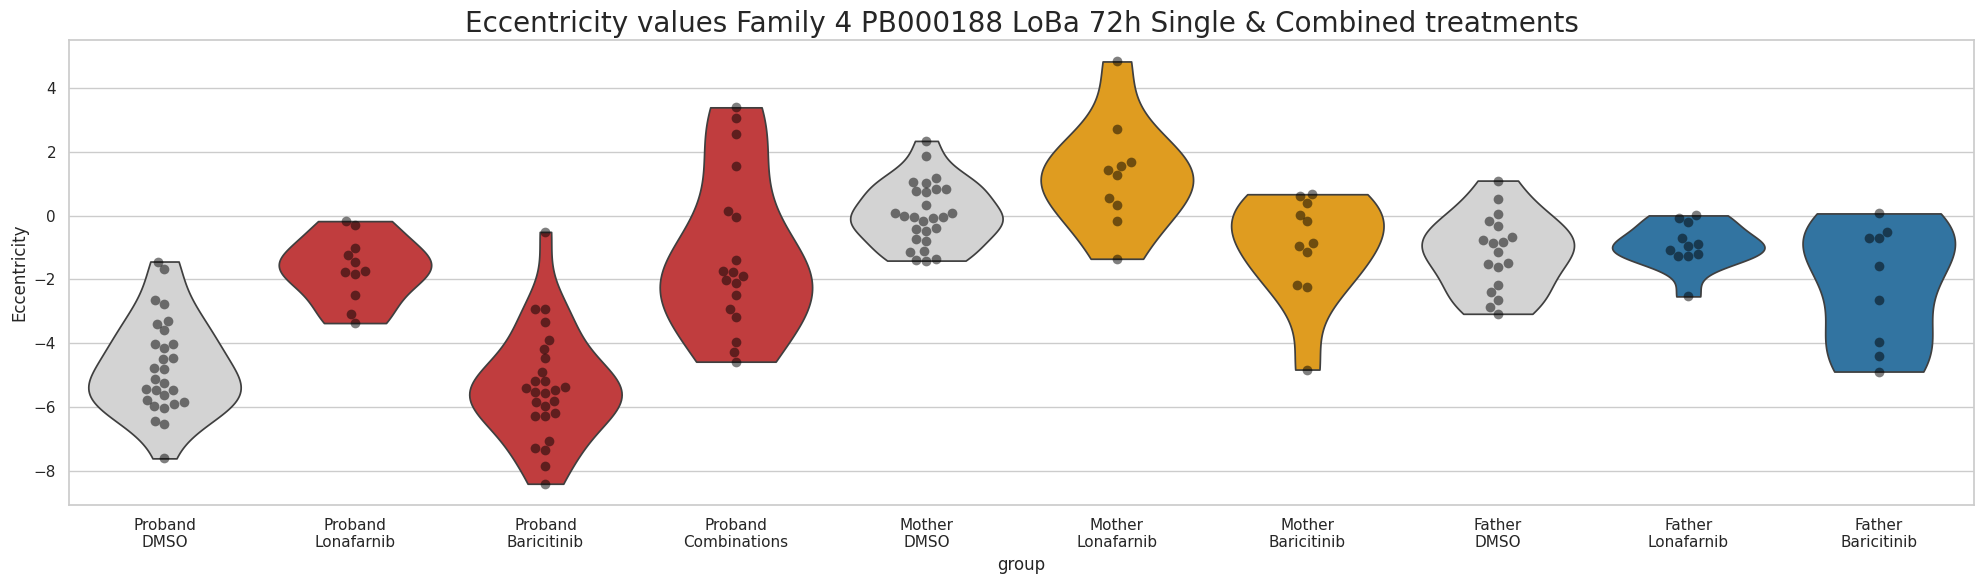

In [81]:
sns.set(style="whitegrid")

# person mapping
person_map = {'F389': 'Father',
              'M388': 'Mother',
              'P387': 'Proband'}

# Your new color scheme
color_map = {
    'Father': '#1f77b4',   # blue
    'Mother': 'orange',    # yellow
    'Proband': '#d62728'   # red
}

df['person'] = df['person_plate'].str[:4].map(person_map)

# Define batch categories
df['batch_group'] = df['batch_id'].replace({
    'HY-15136_HY-15315': 'HYmix',
    'HY-15315_HY-15136': 'HYmix'
})

# Keep only the desired groups
valid_batches = ['PHB000001', 'HY-15136', 'HY-15315', 'HYmix']
df = df[df['batch_group'].isin(valid_batches)]

# Build combined group
df['group'] = df['person'] + "-" + df['batch_group']

# Required plotting order
order = [
    "Proband-PHB000001", "Proband-HY-15136", "Proband-HY-15315", "Proband-HYmix",
    "Mother-PHB000001",  "Mother-HY-15136",  "Mother-HY-15315",  "Mother-HYmix",
    "Father-PHB000001",  "Father-HY-15136",  "Father-HY-15315",  "Father-HYmix"
]
order = [g for g in order if g in df['group'].unique()]

# Build exact palette list in correct order
color_list = []
for g in order:
    person, batch = g.split('-', 1)

    if batch == "PHB000001":       # DMSO
        color_list.append("lightgray")
    else:
        color_list.append(color_map[person])

plt.figure(figsize=(20, 6))

# Violinplot — NO HUE — prevents color scrambling
sns.violinplot(
    data=df,
    x='group',
    y='AreaShape_Eccentricity_nuclei',
    order=order,
    palette=color_list,
    cut=0,
    inner=None
)

# Swarmplot overlay
sns.swarmplot(
    data=df,
    x='group',
    y='AreaShape_Eccentricity_nuclei',
    order=order,
    color='black',
    size=7,
    alpha=0.5
)

# Pretty labels
label_map = {
    "PHB000001": "DMSO",
    "HY-15136": "Lonafarnib",
    "HY-15315": "Baricitinib",
    "HYmix": "Combinations"
}

new_labels = []
for g in order:
    person, batch = g.split('-', 1)
    new_labels.append(f"{person}\n{label_map[batch]}")

plt.xticks(ticks=range(len(order)), labels=new_labels, rotation=0, ha='center')

plt.ylabel("Eccentricity")
plt.title("Eccentricity values Family 4 PB000188 LoBa 72h Single & Combined treatments", fontsize=20)
plt.tight_layout()
plt.show()


### AreaShapeEccentricity values DMSO only

/tmp/ipykernel_23331/811237238.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['person'] = df['person_plate'].str[:4].map(person_map)
/tmp/ipykernel_23331/811237238.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


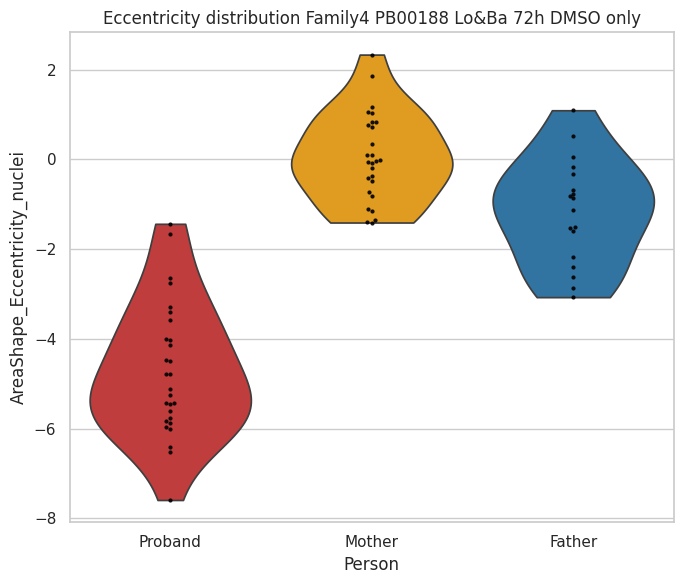

In [40]:
# Ensure seaborn theme
sns.set(style="whitegrid")

# Map 4-letter prefixes to person names and colors
person_map = {'F389': 'Father',
                'M388': 'Mother',
                'P387': 'Proband'}

color_map = {'Father': '#1f77b4',   # blue
                'Mother': 'orange',   # orange
                'Proband': '#d62728'}

# Add person labels
df['person'] = df['person_plate'].str[:4].map(person_map)
order = ['Proband', 'Mother', 'Father']

plt.figure(figsize=(7, 6))

# Violin plot
sns.violinplot(
    data=df,
    x='person',
    y='AreaShape_Eccentricity_nuclei',
    palette=color_map,
    inner=None,   # remove internal boxplot
    cut=0,
    order=order)

# Swarmplot (dots for each value)
sns.swarmplot(data=df, x='person', y='AreaShape_Eccentricity_nuclei', color='black', size=3, alpha=0.9)

plt.xlabel("Person")
plt.ylabel("AreaShape_Eccentricity_nuclei")
plt.title("Eccentricity distribution Family4 PB00188 Lo&Ba 72h DMSO only")
plt.tight_layout()
plt.show()

### Plotting all features per person

/tmp/ipykernel_23331/712362528.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['person'] = df['person_plate'].str[:4].map(person_map)
/tmp/ipykernel_23331/712362528.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot( data=df, x='person', y=feature, palette=color_map, inner=None, cut=0, order=order, ax=ax)
/tmp/ipykernel_23331/712362528.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot( data=df, x='person', y=feature, palette=color_

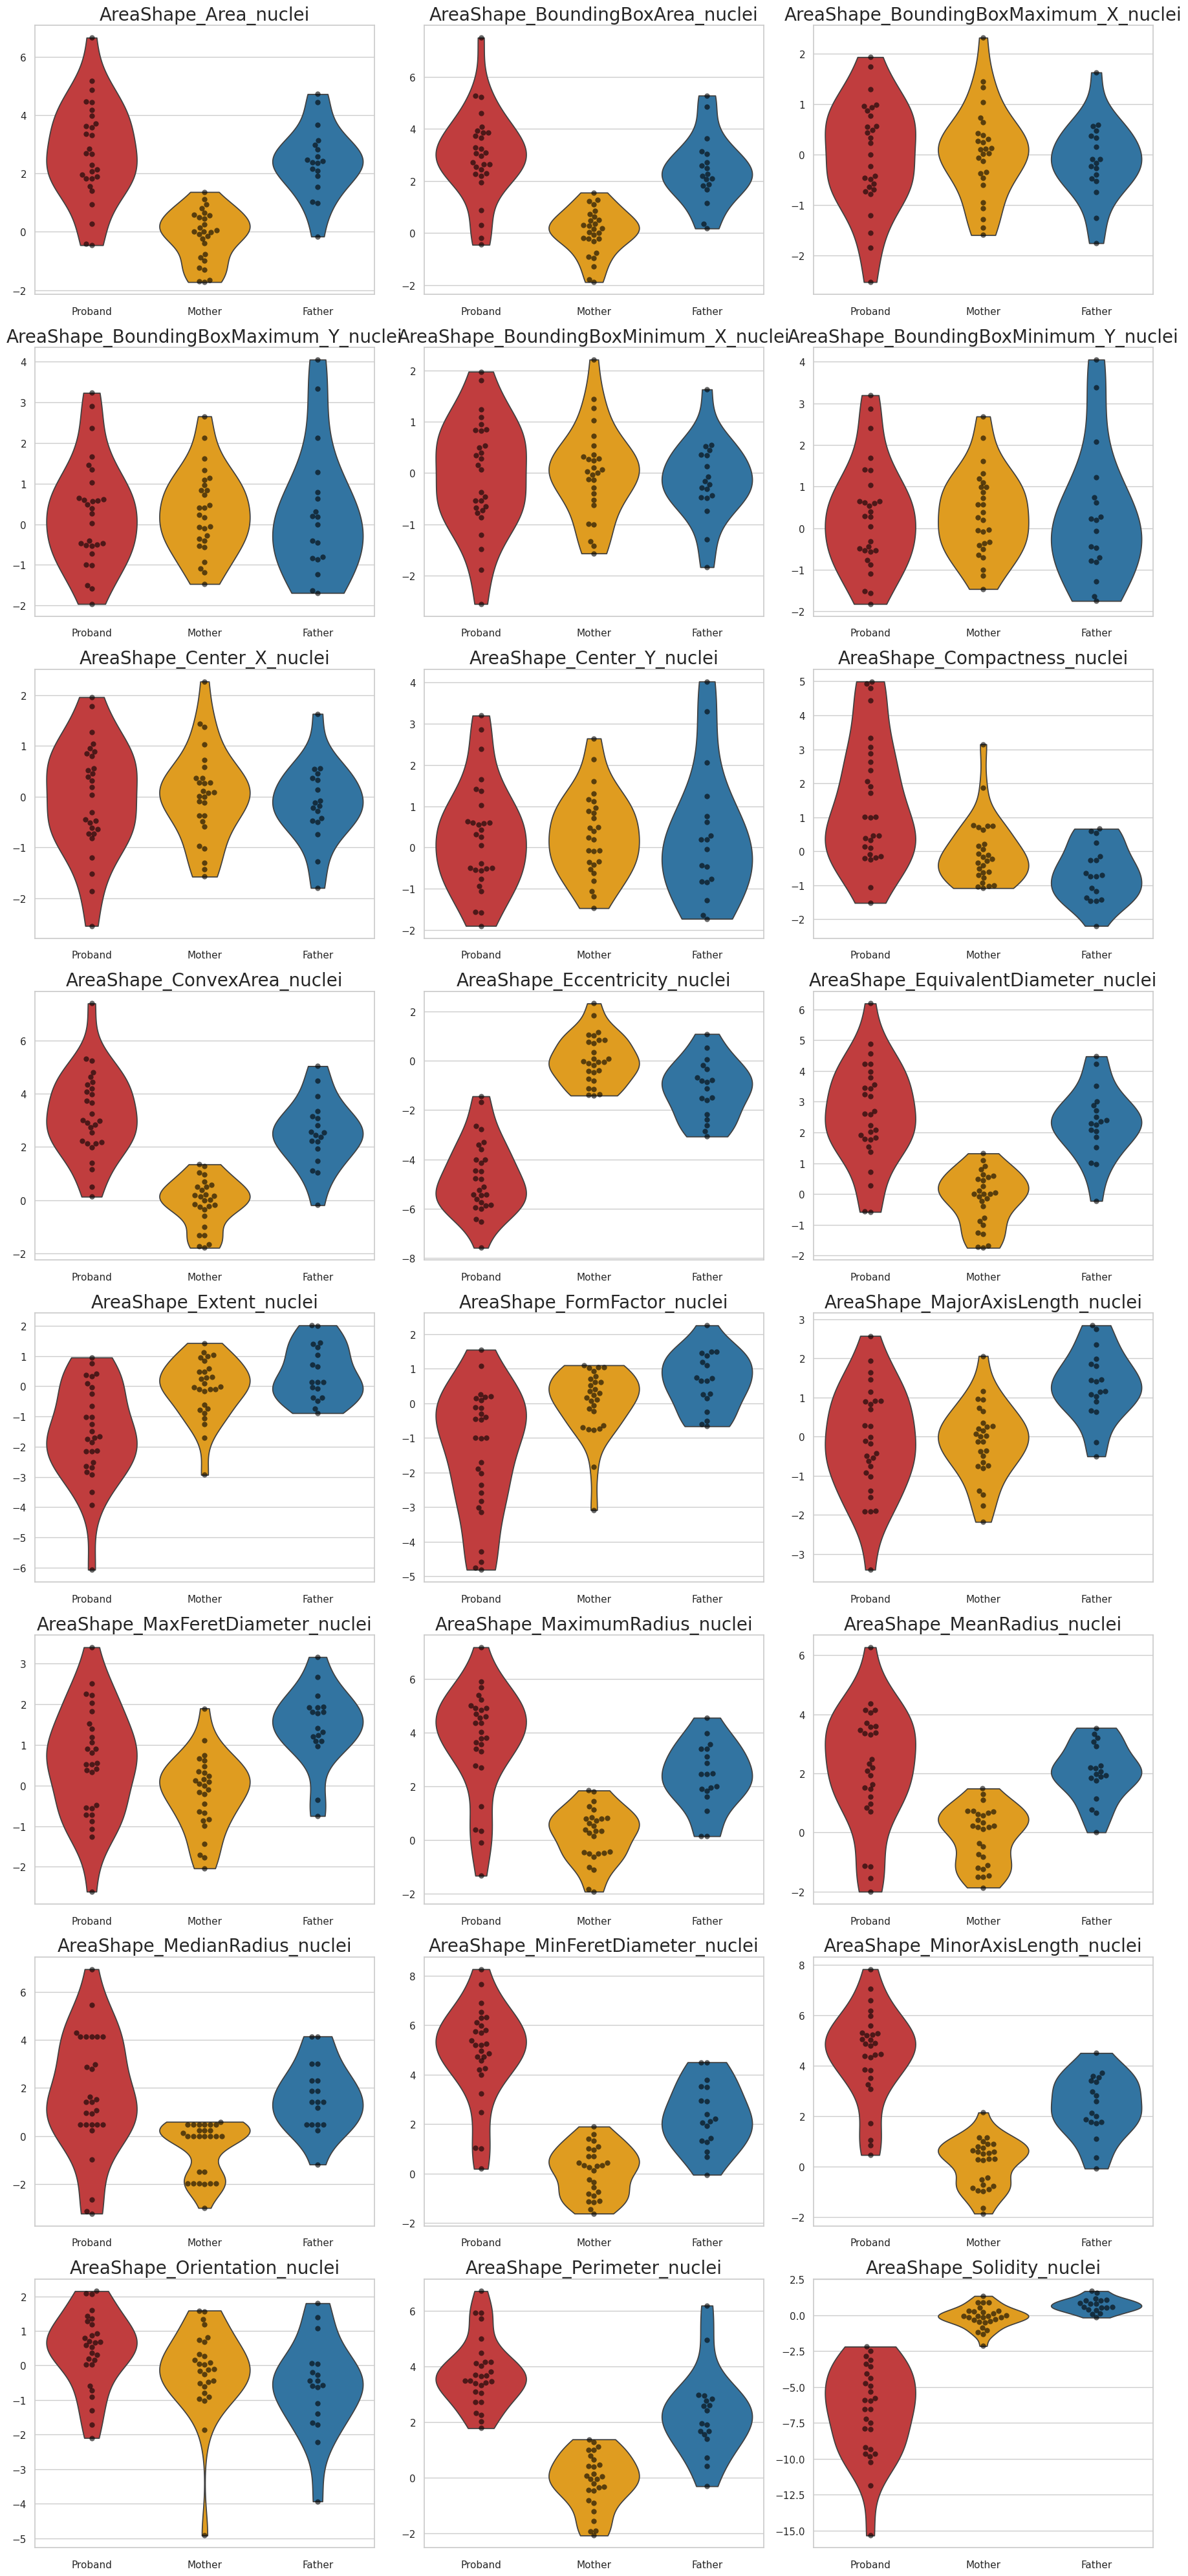

In [39]:
sns.set(style="whitegrid")

# Map 4-letter prefixes to person names and colors
person_map = {'F389': 'Father',
              'M388': 'Mother',
              'P387': 'Proband'}

color_map = {'Father': '#1f77b4',   # blue
             'Mother': 'orange',    # orange
             'Proband': '#d62728'}  # red

# Add person labels
df['person'] = df['person_plate'].str[:4].map(person_map)
order = ['Proband', 'Mother', 'Father']

# Identify all numeric features (exclude person, plate info etc.)
exclude_cols = ['person', 'person_plate', 'WellID', 'plate', 'batch_id', 'comp_conc']
numeric_features = [col for col in df.columns 
                    if col not in exclude_cols and pd.api.types.is_numeric_dtype(df[col])]

# Prepare subplot grid
n = len(numeric_features)
cols = 3
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5))
axes = axes.flatten()

for ax, feature in zip(axes, numeric_features):

    sns.violinplot( data=df, x='person', y=feature, palette=color_map, inner=None, cut=0, order=order, ax=ax)

    sns.swarmplot(data=df, x='person', y=feature, color='black', size=6, alpha=0.6, ax=ax)

    ax.set_title(feature, fontsize=20)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=0, size=10)

# Remove unused axes if any
for i in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
#plt.savefig("all_violinplots.png", dpi=300)
plt.show()

# High-dimension analysis

In [6]:
from sklearn.preprocessing import StandardScaler

# Prepare numeric feature matrix and group labels
X = StandardScaler().fit_transform(df.select_dtypes(include=[float, int]))
groups = df['person_plate'].str[:4]


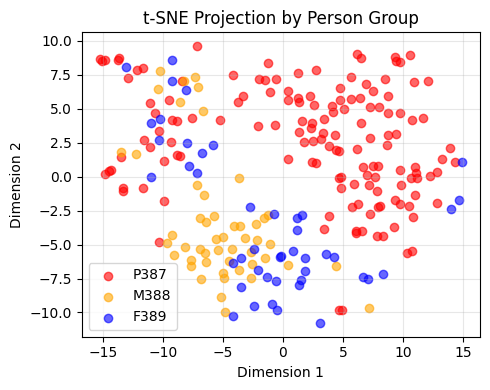

In [7]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)
df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['group'] = groups.values

plt.figure(figsize=(5, 4))
for g, color in zip(['P387', 'M388', 'F389'], ['red', 'orange', 'blue']):
    subset = df_tsne[df_tsne['group'] == g]
    plt.scatter(subset['Dim1'], subset['Dim2'], label=g, alpha=0.6, color=color)
plt.title('t-SNE Projection by Person Group')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


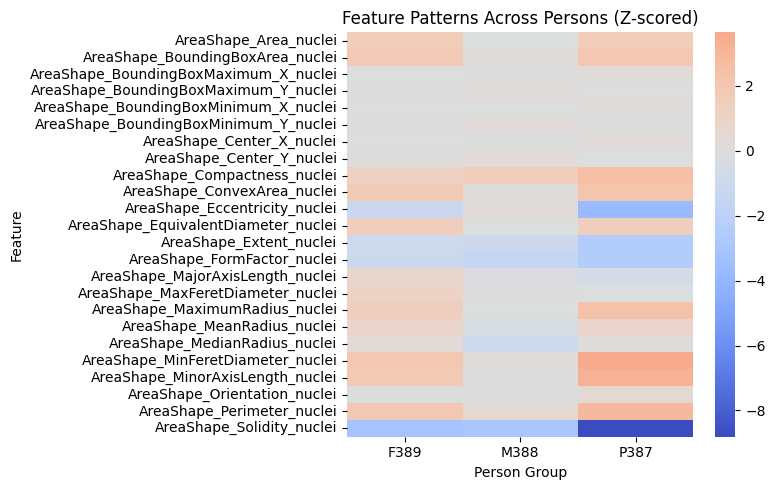

In [8]:
import seaborn as sns

# Cluster heatmap for mean feature values per group
group_means = df.groupby(df['person_plate'].str[:4]).mean(numeric_only=True)
plt.figure(figsize=(8, 5))
sns.heatmap(group_means.T, cmap='coolwarm', center=0)
plt.title('Feature Patterns Across Persons (Z-scored)')
plt.xlabel('Person Group')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

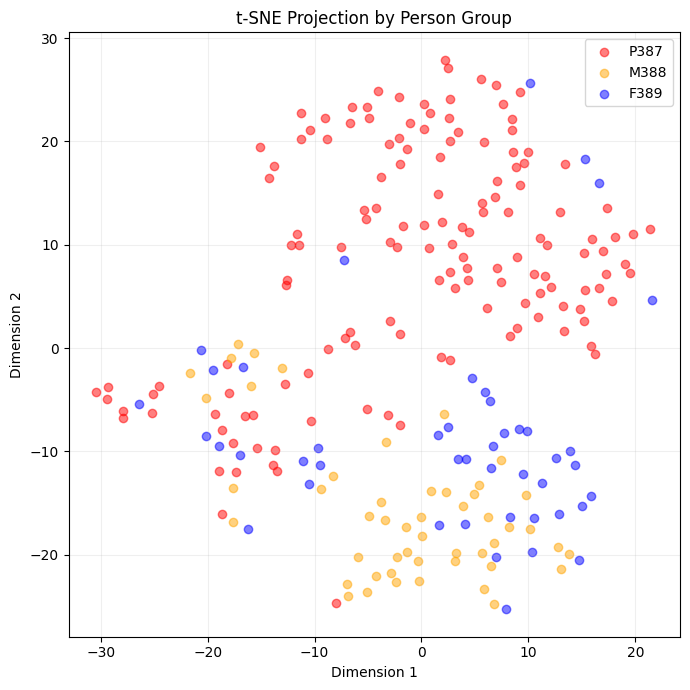

In [9]:
# t-SNE embedding visualization
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, perplexity=15, random_state=42).fit_transform(X)
df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['group'] = groups.values

plt.figure(figsize=(7, 7))
for g, color in zip(['P387', 'M388', 'F389'], ['red', 'orange', 'blue']):
    subset = df_tsne[df_tsne['group'] == g]
    plt.scatter(subset['Dim1'], subset['Dim2'], label=g, alpha=0.5, color=color)
plt.title('t-SNE Projection by Person Group')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### Improved tsne

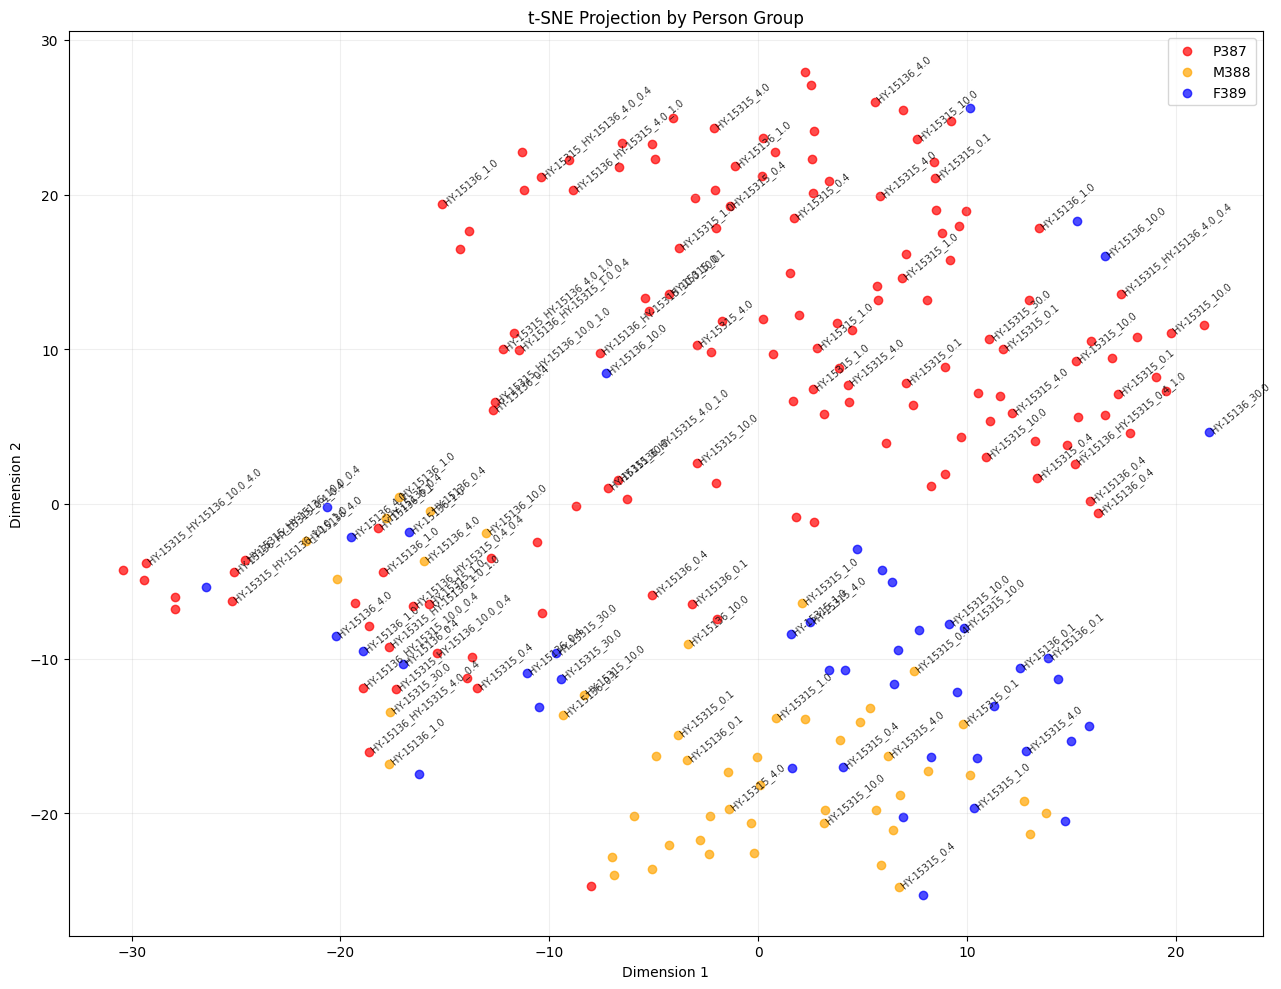

In [10]:
# t-SNE embedding visualization with selective annotation
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, perplexity=15, random_state=42).fit_transform(X)
df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['group'] = groups.values
df_tsne['comp_conc'] = df['comp_conc'].values

plt.figure(figsize=(13, 10))
for g, color in zip(['P387', 'M388', 'F389'], ['red', 'orange', 'blue']):
    subset = df_tsne[df_tsne['group'] == g]
    plt.scatter(subset['Dim1'], subset['Dim2'], label=g, alpha=0.7, color=color)

# Annotate only points with specified compounds
mask = df_tsne['comp_conc'].str.startswith(('HY-15315', 'HY-15136'))
for _, row in df_tsne[mask].iterrows():
    plt.text(row['Dim1'], row['Dim2'], row['comp_conc'],
             fontsize=7, color='black', alpha=0.8, rotation=40)

plt.title('t-SNE Projection by Person Group')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### DMSO included

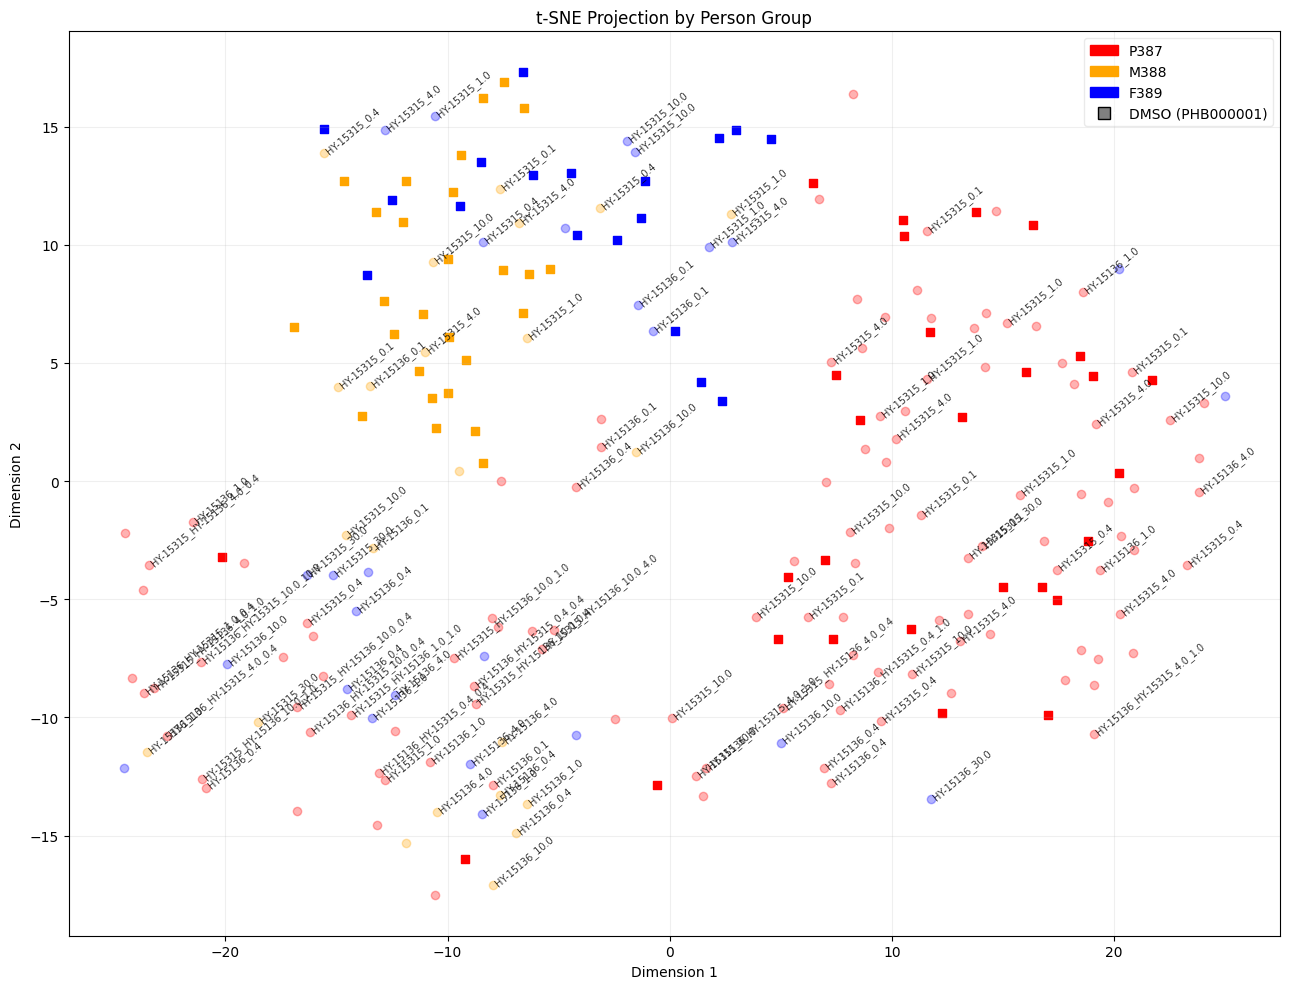

In [11]:
# t-SNE embedding visualization with selective annotation
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

X_tsne = TSNE(n_components=2, perplexity=18, random_state=42).fit_transform(X)
df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['group'] = groups.values
df_tsne['comp_conc'] = df['comp_conc'].values

plt.figure(figsize=(13, 10))
for g, color in zip(['P387', 'M388', 'F389'], ['red', 'orange', 'blue']):
    subset = df_tsne[df_tsne['group'] == g]

    # Split into PHB000001-containing and others
    subset_squares = subset[subset['comp_conc'].str.contains('PHB000001', na=False)]
    subset_circles = subset[~subset['comp_conc'].str.contains('PHB000001', na=False)]

    # Plot circles (default)
    plt.scatter(subset_circles['Dim1'], subset_circles['Dim2'],
                label=g, alpha=0.3, color=color, marker='o')
    # Plot squares for PHB000001
    plt.scatter(subset_squares['Dim1'], subset_squares['Dim2'],
                alpha=1, color=color, marker='s', edgecolor=color)

# Annotate only points with specified compounds
mask = df_tsne['comp_conc'].str.startswith(('HY-15315', 'HY-15136'))
for _, row in df_tsne[mask].iterrows():
    plt.text(row['Dim1'], row['Dim2'], row['comp_conc'],
             fontsize=7, color='black', alpha=0.8, rotation=40)

# Define legend patches
legend_patches = [
    mpatches.Patch(color='red', label='P387'),
    mpatches.Patch(color='orange', label='M388'),
    mpatches.Patch(color='blue', label='F389'),
    plt.Line2D([0], [0], marker='s', color='w', label='DMSO (PHB000001)',
               markerfacecolor='gray', markeredgecolor='black', markersize=8)
]

# Add legend
plt.legend(handles=legend_patches, loc='best', framealpha=0.4)

plt.title('t-SNE Projection by Person Group')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


### t-SNE with all compounds except for DMSO

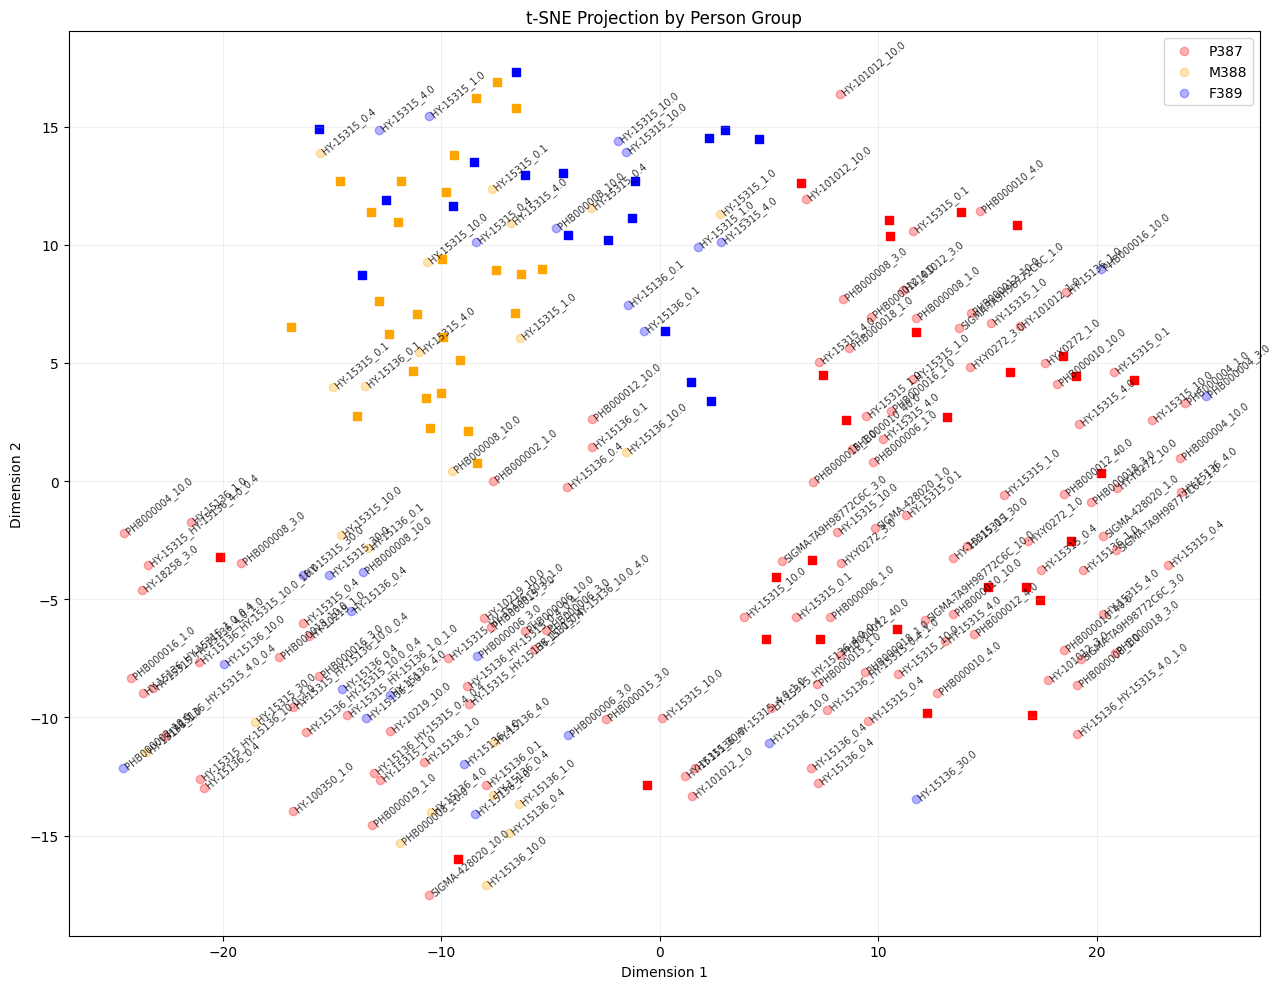

In [12]:
# t-SNE embedding visualization with selective annotation
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, perplexity=18, random_state=42).fit_transform(X)
df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['group'] = groups.values
df_tsne['comp_conc'] = df['comp_conc'].values

plt.figure(figsize=(13, 10))
for g, color in zip(['P387', 'M388', 'F389'], ['red', 'orange', 'blue']):
    subset = df_tsne[df_tsne['group'] == g]

    # Split into PHB000001-containing and others
    subset_squares = subset[subset['comp_conc'].str.contains('PHB000001', na=False)]
    subset_circles = subset[~subset['comp_conc'].str.contains('PHB000001', na=False)]

    # Plot circles (default)
    plt.scatter(subset_circles['Dim1'], subset_circles['Dim2'],
                label=g, alpha=0.3, color=color, marker='o')
    # Plot squares for PHB000001
    plt.scatter(subset_squares['Dim1'], subset_squares['Dim2'],
                alpha=1, color=color, marker='s', edgecolor=color)

# Annotate all compounds except PHB000001
mask = ~df_tsne['comp_conc'].str.contains('PHB000001', na=False)
for _, row in df_tsne[mask].iterrows():
    plt.text(row['Dim1'], row['Dim2'], row['comp_conc'],
             fontsize=7, color='black', alpha=0.8, rotation=40)
legend_patches = [
    mpatches.Patch(color='red', label='P387'),
    mpatches.Patch(color='orange', label='M388'),
    mpatches.Patch(color='blue', label='F389'),
    plt.Line2D([0], [0], marker='s', color='w', label='DMSO (PHB000001)',
               markerfacecolor='gray', markeredgecolor='black', markersize=8)
]
plt.legend(handles=legend_patches, loc='best', framealpha=0.4)

plt.title('t-SNE Projection by Person Group')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### UMAP

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


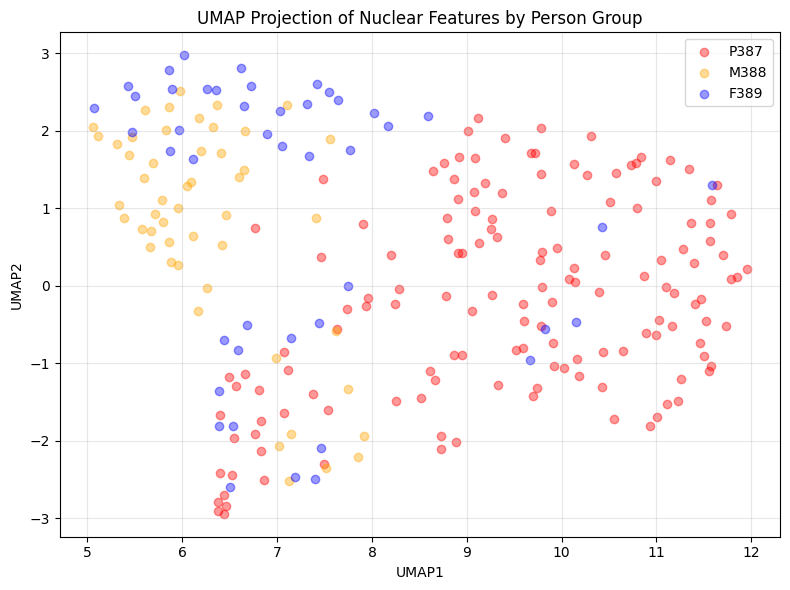

In [13]:
import umap
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler

# Prepare numeric features
X = StandardScaler().fit_transform(df.select_dtypes(include=[float, int]))
groups = df['person_plate'].str[:4]

# Run UMAP
umap_model = umap.UMAP(n_neighbors=20, min_dist=0.2, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# Create DataFrame
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['group'] = groups

# Plot
plt.figure(figsize=(8, 6))
for g, color in zip(['P387', 'M388', 'F389'], ['red', 'orange', 'blue']):
    subset = df_umap[df_umap['group'] == g]
    plt.scatter(subset['UMAP1'], subset['UMAP2'], label=g, alpha=0.4, color=color)

plt.title('UMAP Projection of Nuclear Features by Person Group')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


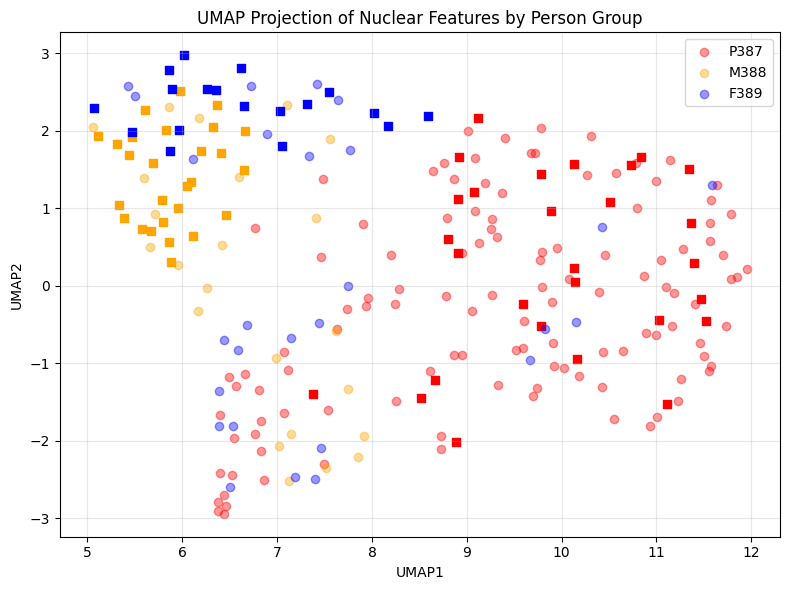

In [14]:
import umap
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler

# Prepare numeric features
X = StandardScaler().fit_transform(df.select_dtypes(include=[float, int]))
groups = df['person_plate'].str[:4]
compounds = df['comp_conc']

# Run UMAP
umap_model = umap.UMAP(n_neighbors=20, min_dist=0.2, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# Create DataFrame
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['group'] = groups
df_umap['comp_conc'] = compounds

# Plot
plt.figure(figsize=(8, 6))
for g, color in zip(['P387', 'M388', 'F389'], ['red', 'orange', 'blue']):
    subset = df_umap[df_umap['group'] == g]

    # Split into PHB000001-containing and others
    subset_squares = subset[subset['comp_conc'].str.contains('PHB000001', na=False)]
    subset_circles = subset[~subset['comp_conc'].str.contains('PHB000001', na=False)]

    # Circles (default)
    plt.scatter(subset_circles['UMAP1'], subset_circles['UMAP2'], label=g, alpha=0.4, color=color, marker='o')
    # Squares for PHB000001
    plt.scatter(subset_squares['UMAP1'], subset_squares['UMAP2'], alpha=1, color=color, marker='s', edgecolor=color)

plt.title('UMAP Projection of Nuclear Features by Person Group')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


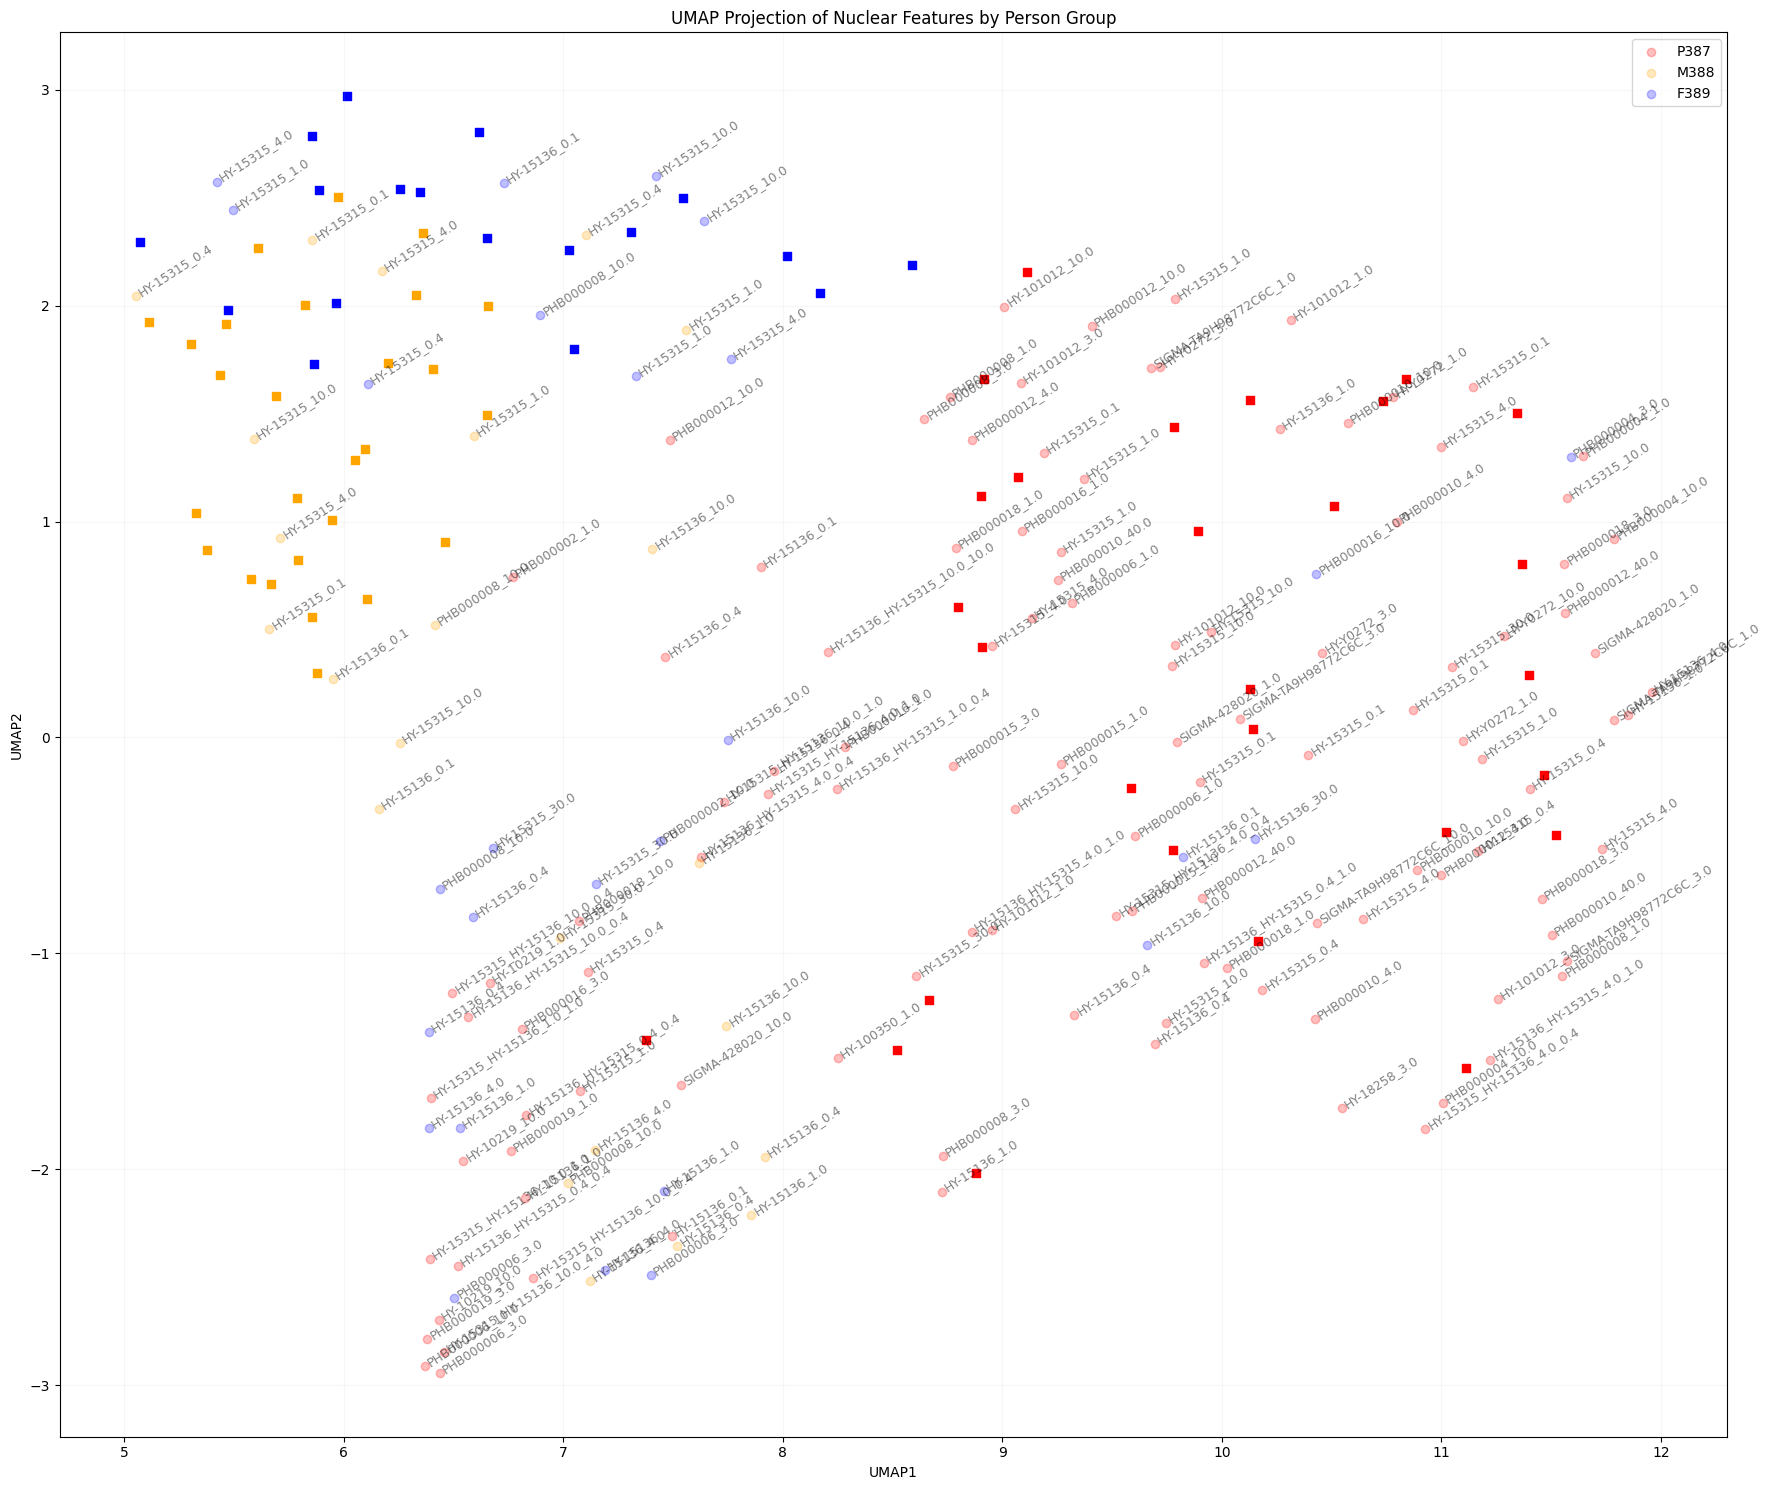

In [15]:
import umap
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler

# Prepare numeric features
X = StandardScaler().fit_transform(df.select_dtypes(include=[float, int]))
groups = df['person_plate'].str[:4]
compounds = df['comp_conc']

# Run UMAP
umap_model = umap.UMAP(n_neighbors=20, min_dist=0.2, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# Create DataFrame
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['group'] = groups
df_umap['comp_conc'] = compounds

# Plot
plt.figure(figsize=(18, 15))
for g, color in zip(['P387', 'M388', 'F389'], ['red', 'orange', 'blue']):
    subset = df_umap[df_umap['group'] == g]

    # Split into PHB000001-containing and others
    subset_squares = subset[subset['comp_conc'].str.contains('PHB000001', na=False)]
    subset_circles = subset[~subset['comp_conc'].str.contains('PHB000001', na=False)]

    # Circles (default)
    plt.scatter(subset_circles['UMAP1'], subset_circles['UMAP2'], label=g, alpha=0.25, color=color, marker='o')
    # Squares for PHB000001
    plt.scatter(subset_squares['UMAP1'], subset_squares['UMAP2'], alpha=1, color=color, marker='s', edgecolor=color)

    # Annotate compound info for circular points
    for _, row in subset_circles.iterrows():
        plt.text(row['UMAP1'], row['UMAP2'], row['comp_conc'],
                 fontsize=9, color='black', alpha=0.5, rotation=33)

plt.title('UMAP Projection of Nuclear Features by Person Group')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()


### PCA

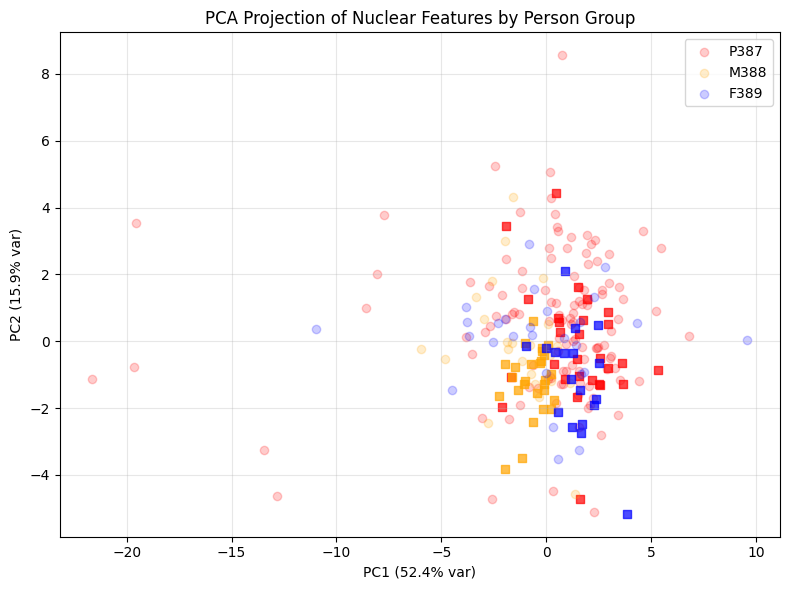

In [16]:
# PCA visualization highlighting PHB000001 samples as squares
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare numeric features
X = StandardScaler().fit_transform(df.select_dtypes(include=[float, int]))
groups = df['person_plate'].str[:4]
compounds = df['comp_conc']

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['group'] = groups.values
df_pca['comp_conc'] = compounds.values

# Plot
plt.figure(figsize=(8, 6))
for g, color in zip(['P387', 'M388', 'F389'], ['red', 'orange', 'blue']):
    subset = df_pca[df_pca['group'] == g]

    # Split into PHB000001-containing and others
    subset_squares = subset[subset['comp_conc'].str.contains('PHB000001', na=False)]
    subset_circles = subset[~subset['comp_conc'].str.contains('PHB000001', na=False)]

    # Plot circles (default)
    plt.scatter(subset_circles['PC1'], subset_circles['PC2'], label=g, alpha=0.2, color=color, marker='o')
    # Plot squares for PHB000001
    plt.scatter(subset_squares['PC1'], subset_squares['PC2'], alpha=0.7, color=color, marker='s', edgecolor=color)

plt.title('PCA Projection of Nuclear Features by Person Group')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
